Principal component analysis (PCA) refers to a statistical technique whose purpose is to convert high dimensional data to low dimensional data. The conversion is achieved by selecting the most important features that capture the most information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component, and so on. 

PCA is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. 

One of the main advantages of dimensionality reduction with PCA is that it significantly reduces the time it takes to train the algorithms as there are fewer features. Another reason is that it makes it easy to analyze multi-dimension data. 

In [1]:
import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

Creating variables (X and y).

In [4]:
X = dataset.drop(columns='Class')
y = dataset['Class']

All the features considered (n_components not specified): in this case, we use all the features; that is, we do not reduce the dimensions.

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Running pca with all features considered
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Run a classification 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Assessing the model performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
#print(cm)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9


Checking the variance caused by each of the principal components.

In [6]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72226528, 0.23974795, 0.03338117, 0.0046056 ])

Results indicate that much of the variance is explained by the first component (72.2%) and to some degree the second component (23.9%).

Specifying only 1 component: Now, we can try to run the model but with only 1 component -- as opposed to using all the features.

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler

#Scaling data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Running pca with only 1 component
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Run a classification 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Assessing the model performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
#print(cm)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


We can see that the reduction in the number of features used (from 4 to only 1) does not change the accuracy. Let's see what happens when we increase the number of features from 1 to 2.

Running PCA with 2 components.

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Running pca with only 2 components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
#print(cm)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8


Results indicate that the accuracy decreases a little bit when the number of features used increases from 1 to 2. We can now test what happens when we further increase the number of features from 2 to 3.

Running PCA with 3 components.

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
#print(cm)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8


Bonus: Sklearn example.

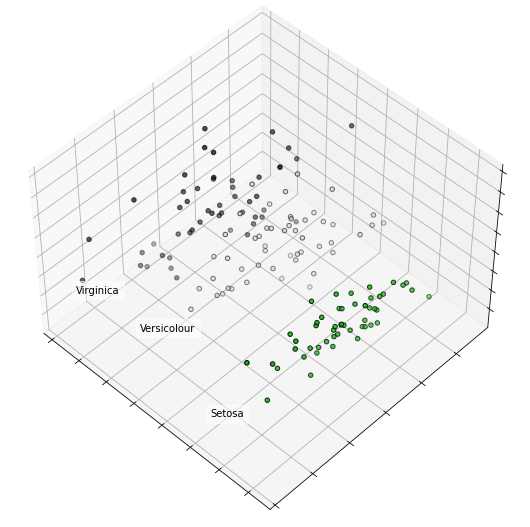

In [10]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(8, 7))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

Good resources:
1. https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/;
2.https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html;
3.https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 